## Mitsiu Alejandro Carreño Sarabia - E23S-18014

In [ ]:
## Ejercicio 1
def function(n, arr):
    '''
    Description:
        Get the runner-up from a list of scores
    Inputs:
        n (number)
        arr (string) list of scores separated by a space
    Outputs:
        number: The score of the runner-up
    '''
    arr = arr.split(" ")

    arr =  [int(x) for x in arr]


    if n != len(arr):
        raise ValueError(f"Invalid number of elements received {len(arr)} expected {n}")

    # Remove duplicates
    arr = list(set(arr))

    if n < 2 or n > 100:
        raise ValueError(f"Invalid n={n}, 2<=n<=100")
    for score in arr:
        if int(score) < -100 or int(score) > 100:
            raise ValueError(f"Invalid score={score}, -100 <= score <= 100")


    #Order array
    arr.sort(reverse=True)

    if n > 1:
        return arr[1]
    else:
        raise ValueError("Only one participant, no runner-up")



while True:
    try:
        n = int(input("Enter the number of participants: "))
        arr = input("Enter the score for each participant, separated by spaces (2 3 6 6 5): ")
        runner = function(n, arr)
        print(f"The score for the runner up is: {runner}")
        break
    except ValueError as e:
        print(e);
    except:
        print("Internal error, try again")


Enter the number of participants: 5
Enter the score for each participant, separated by spaces (2 3 6 6 5): 2 3 6 6 5
The score for the runner up is: 5


2.¿Qué es la derivada?     
La derivada es la pendiente de un punto en una función.  
    
3.¿Qué sucede cuando la derivada es igual a cero?   
Significa que la pendiente para ese punto es cero (una línea horizontal), significa que encontramos un valor en que nuestra función tiene un valór mínimo, máximo o un punto silla    
     
4.¿Explique de forma general el problema de regresión lineal?    
El problema de regresión líneal encuentra la línea que mejor se ajusta a una serie de datos, dicha línea puede ser recta o curva (polinomial), de esta manera basados en la línea que mejor se ajuste a los datos, es posible predecir o estimar valores que no forman parte de nuestros datos originales   

5.¿Qué significa R2 en un modelo?  
R2 es un valor que nos permite estimar que tan correctamente esta estimando nuestro modelo los datos, queremos que nuestro modelo abstraiga la relación de nuestros datos.

B0=9827.581739701121
B1=[-894.44878821]
y = -894.4487882069839x + 9827.581739701121
Si la casa estuviera a 1 km el precio estimado es: [8933.13295149]


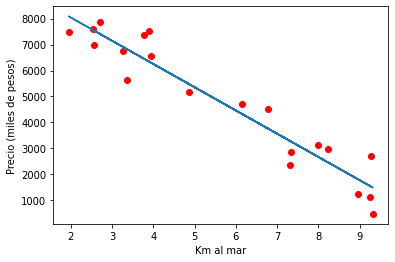

In [ ]:
## Ejercicio 6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data=pd.read_csv('data1.csv')

#print(data.head())
X = np.array(data["distancia"])

reg = LinearRegression().fit(X.reshape(-1,1), data["precio"])
y_predicted = reg.predict(X.reshape(-1,1))

plt.scatter(data["distancia"], data["precio"], color='red')
plt.plot(data["distancia"], y_predicted, label=f'y={reg.coef_}x+{reg.intercept_}')
plt.xlabel("Km al mar")
plt.ylabel("Precio (miles de pesos)")

b0 = reg.intercept_
b1 = reg.coef_
print(f"B0={b0}")
print(f"B1={b1}")
print(f"y = {b1[0]}x + {b0}")
prediction = reg.predict(np.array([[1]]))
print(f"Si la casa estuviera a 1 km el precio estimado es: {prediction}")



B0=8563.653419174912
B1=[-725.54772445]
y = -725.5477244509086x + 8563.653419174912
Si la casa estuviera a 1 km el precio estimado es: [7838.10569472]


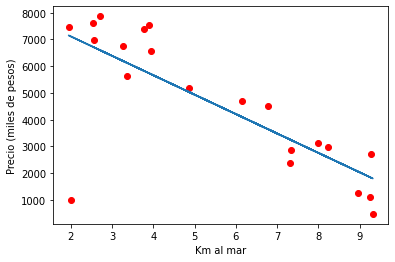

In [ ]:
## Ejercicio 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data=pd.read_csv('data2.csv')

#print(data.head())
X = np.array(data["distancia"])

reg = LinearRegression().fit(X.reshape(-1,1), data["precio"])
y_predicted = reg.predict(X.reshape(-1,1))

plt.scatter(data["distancia"], data["precio"], color='red')
plt.plot(data["distancia"], y_predicted, label=f'y={reg.coef_}x+{reg.intercept_}')
plt.xlabel("Km al mar")
plt.ylabel("Precio (miles de pesos)")

b0 = reg.intercept_
b1 = reg.coef_
print(f"B0={b0}")
print(f"B1={b1}")
print(f"y = {b1[0]}x + {b0}")
prediction = reg.predict(np.array([[1]]))
print(f"Si la casa estuviera a 1 km el precio estimado es: {prediction}")



7.- Los valores son distintos del ejercicio 6 porque existe una casa que esta a 2 km del mar y solo cuesta 1000 (una ganga) este punto, va en contra de la tendencia de casas, y nuestro modelo intenta encontrar la recta que menor error tenga en sus estimaciones, por ello este punto en especifico "jala la recta" y abarata las estimaciones  

La relación entre taxes (x) y revenue (y) sigue una tendencia similar a 
y = -x^2


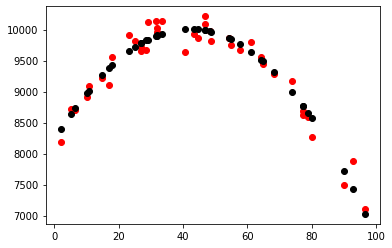

y = -1.0031508266542577x^2 + 84.44825541383669x + 8232.719778344703
El valor predecido para el 50% es: 9947.255482400893


In [ ]:
## Ejercicio 8
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data=pd.read_csv('data3.csv')

#print(data.head())

X = np.array(data["taxes"])
y = np.array(data["revenue"])


plt.scatter(X, y, color='red')


print("La relación entre taxes (x) y revenue (y) sigue una tendencia similar a ")
print("y = -x^2")

#### Ajuste polinomial

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1,1))

poly_reg = LinearRegression().fit(poly_features, y)

#plt.scatter(taxes, revenue,color='red')
y_predicted = poly_reg.predict(poly_features)
plt.scatter(X, y_predicted, color="black")
plt.show()

print(f"y = {poly_reg.coef_[1]}x^2 + {poly_reg.coef_[0]}x + {poly_reg.intercept_}")

prediction = poly_reg.predict(np.array([[50, 50**2]]))
print(f"El valor predecido para el 50% es: {prediction[0]}")


Con los datos originales R2: 0.7087225881641541


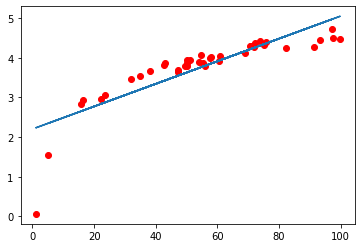

Con los datos linealizados R2: 0.9272292005709035


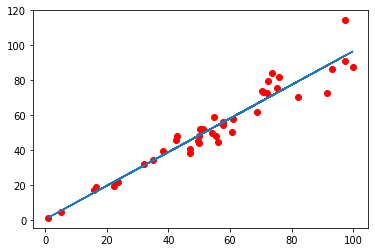

Los datos originales tienen un comportamiento de una funcion logaritmica, con un crecimiento acelerado al inicio, para luego estabilizarse
Si a los datos originales, le aplicamos una funcion exponencial, es decir
y=log(x) ---> exp(y) = x
Mantenemos la relación entre los datos, pero mediante esta transformación los datos se acercan más a una línea recta, por ello es posible realizar una mejor predicción/estimación


In [ ]:
## Ejercicio 9
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data=pd.read_csv('data4.csv')

#print(data.head())

X = np.array(data["X"])

reg = LinearRegression().fit(X.reshape(-1,1), data["y"])
y_predicted = reg.predict(X.reshape(-1,1))

plt.scatter(X, data["y"], color='red')
plt.plot(X, y_predicted, label=f'y={reg.coef_}x+{reg.intercept_}')


r2 = reg.score(X.reshape(-1,1), data["y"])
print(f"Con los datos originales R2: {r2}")
plt.show()

####### Linealizando datos

e_y = np.array([math.exp(i) for i in data["y"]])
reg_2 = LinearRegression().fit(X.reshape(-1,1), e_y)

y_predict_2 = reg_2.predict(X.reshape(-1,1))

plt.scatter(X, e_y, color='red')
plt.plot(X, y_predict_2)

r2_2 = reg_2.score(X.reshape(-1,1), e_y)
print(f"Con los datos linealizados R2: {r2_2}")

plt.show()

print("Los datos originales tienen un comportamiento de una funcion logaritmica, con un crecimiento acelerado al inicio, para luego estabilizarse")
print("Si a los datos originales, le aplicamos una funcion exponencial, es decir")
print("y=log(x) ---> exp(y) = x")
print("Mantenemos la relación entre los datos, pero mediante esta transformación los datos se acercan más a una línea recta, por ello es posible realizar una mejor predicción/estimación")

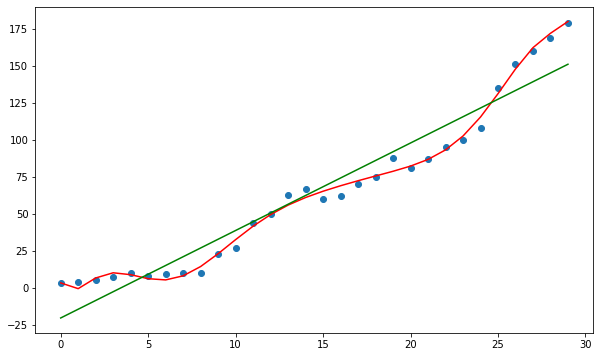

Overfitting (rojo) se apega demasiado a los datos de entrenamiento, lo cual no abstrae realmente las relaciones entre los datos, sino que los "calca" forzando la línea
Underfitting (verde) es lo contrario de overfitting, abstrae demasiado y solo dá una vaga idea del comportamiento, sin realmente capturar sus relaciones especificas


In [ ]:
## Ejercicio 10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

## Crear un polinomio de grado 10 para exagerar la similitud con los datos

poly = PolynomialFeatures(degree=10, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1).copy())

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)


## Crear una regresión lineal para no acercarnos a muchos datos
reg = LinearRegression().fit(x.reshape(-1,1).copy(), y)
y_linear_predicted = reg.predict(x.reshape(-1,1).copy())


plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x, y_predicted, c="red", label="Overfitting")
plt.plot(x, y_linear_predicted, c="green", label="Underfitting")
plt.show()

print("Overfitting (rojo) se apega demasiado a los datos de entrenamiento, lo cual no abstrae realmente las relaciones entre los datos, sino que los \"calca\" forzando la línea")
print("Underfitting (verde) es lo contrario de overfitting, abstrae demasiado y solo dá una vaga idea del comportamiento, sin realmente capturar sus relaciones especificas")